## Brownian tree with pytorch:

In [1]:
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
import torch
from torch.nn import functional as F
import utils as ut
import utils_torch as ut_t

In [2]:
# Constants
gridSize = 301 # grid size (odd)
assert(gridSize % 2 == 1)
percParticles = 10
partNum = gridSize * gridSize * percParticles // 100
iters = 1500
conncetivity = 8
useGPU = True 
useOldMoveFunc = False

In [3]:
# Device to use
device_name = 'cuda' if useGPU and torch.cuda.is_available() else 'cpu'
device = torch.device(device_name)

# Displacements for getMoveLoc()
disps  = torch.arange(-1, 2).to(device=device)

# Kernel for dilation()
kernel = ut_t.generateKernel(conncetivity).to(device=device)

# Initialisation of fields
ffield, mfield = [np.zeros((gridSize, gridSize), dtype=np.uint8) for i in range(2)]
ffield[gridSize//2, gridSize//2] = 1
ut.placeDots(mfield, partNum)
ffield = torch.Tensor(ffield).type(torch.uint8).to(device=device)
mfield = torch.Tensor(mfield).type(torch.uint8).to(device=device)

# Main cycle
for i in tqdm(range(iters)):
    ffield, mfield = ut_t.freezeDots(ffield, mfield, kernel)
    mfield = ut_t.moveDots(mfield, disps, device) if useOldMoveFunc else ut_t.newMoveDots(mfield, device)


100%|██████████| 1500/1500 [00:12<00:00, 117.41it/s]


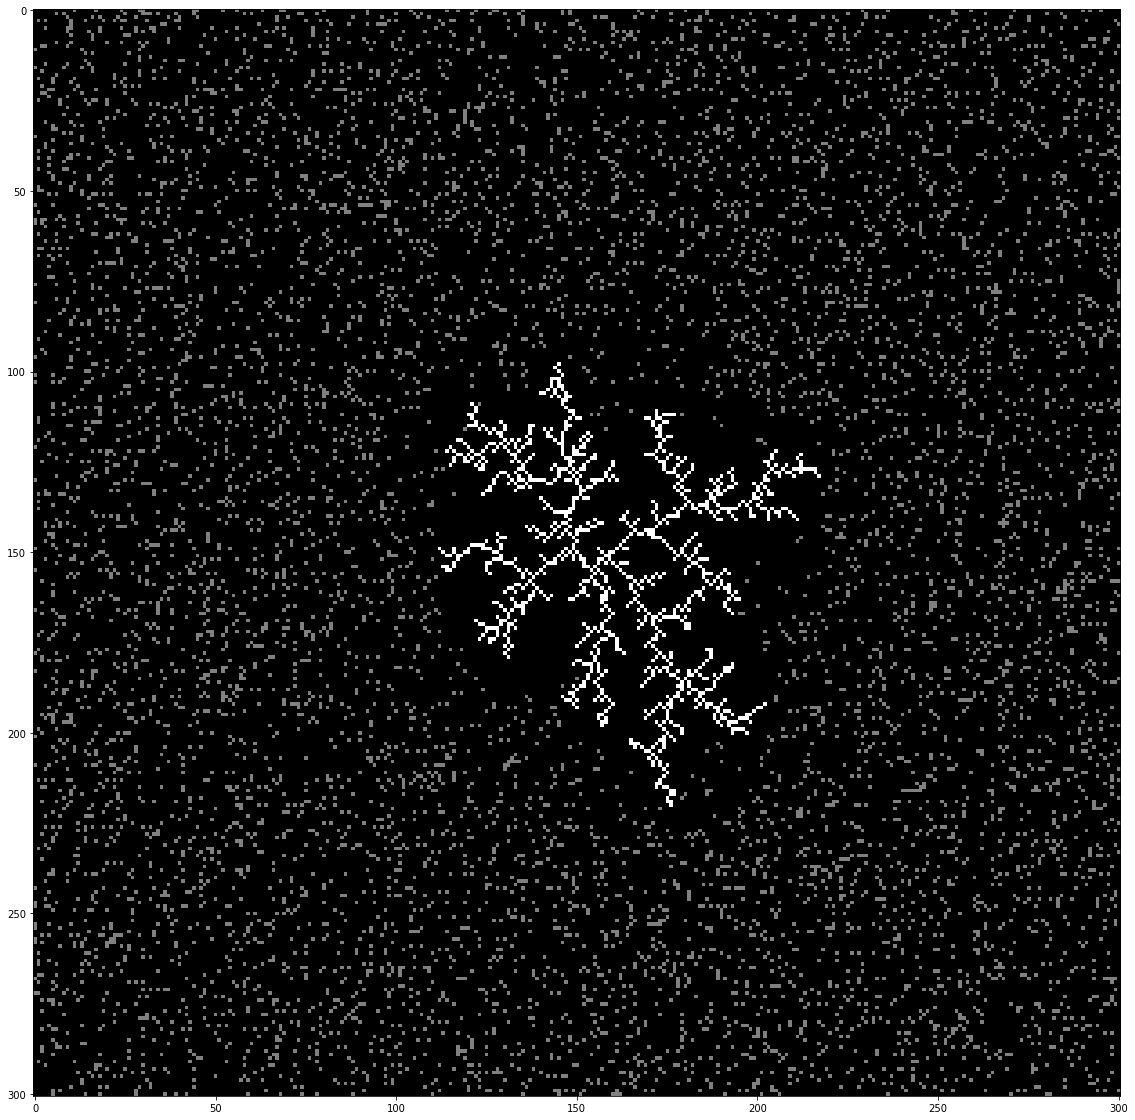

In [4]:
temp = [2 * ffield + mfield]
fig, axs = plt.subplots(1, len(temp), figsize=(20, 20))
for n, i in enumerate(temp):
    axs.imshow(i.cpu().numpy(), cmap=plt.get_cmap("gray"))
plt.show()